In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import kstest

In [3]:
B_datos = 'C:/Users/juand/OneDrive/Documentos/Codigos/Nueva carpeta/arabica_data_cleaned.csv '
datos = pd.read_csv(B_datos)

In [4]:
datos.head(), datos.info(), datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1163 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

(   Unnamed: 0  Species                     Owner Country.of.Origin  \
 0           1  Arabica                 metad plc          Ethiopia   
 1           2  Arabica                 metad plc          Ethiopia   
 2           3  Arabica  grounds for health admin         Guatemala   
 3           4  Arabica       yidnekachew dabessa          Ethiopia   
 4           5  Arabica                 metad plc          Ethiopia   
 
                                   Farm.Name Lot.Number       Mill ICO.Number  \
 0                                 metad plc        NaN  metad plc  2014/2015   
 1                                 metad plc        NaN  metad plc  2014/2015   
 2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
 3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
 4                                 metad plc        NaN  metad plc  2014/2015   
 
                                  Company       Altitude  ...  Color  \
 0      meta

## 1

### Mediante un análisis exploratorio básico, proponga una distribución teórica candidata para representar los datos originales.


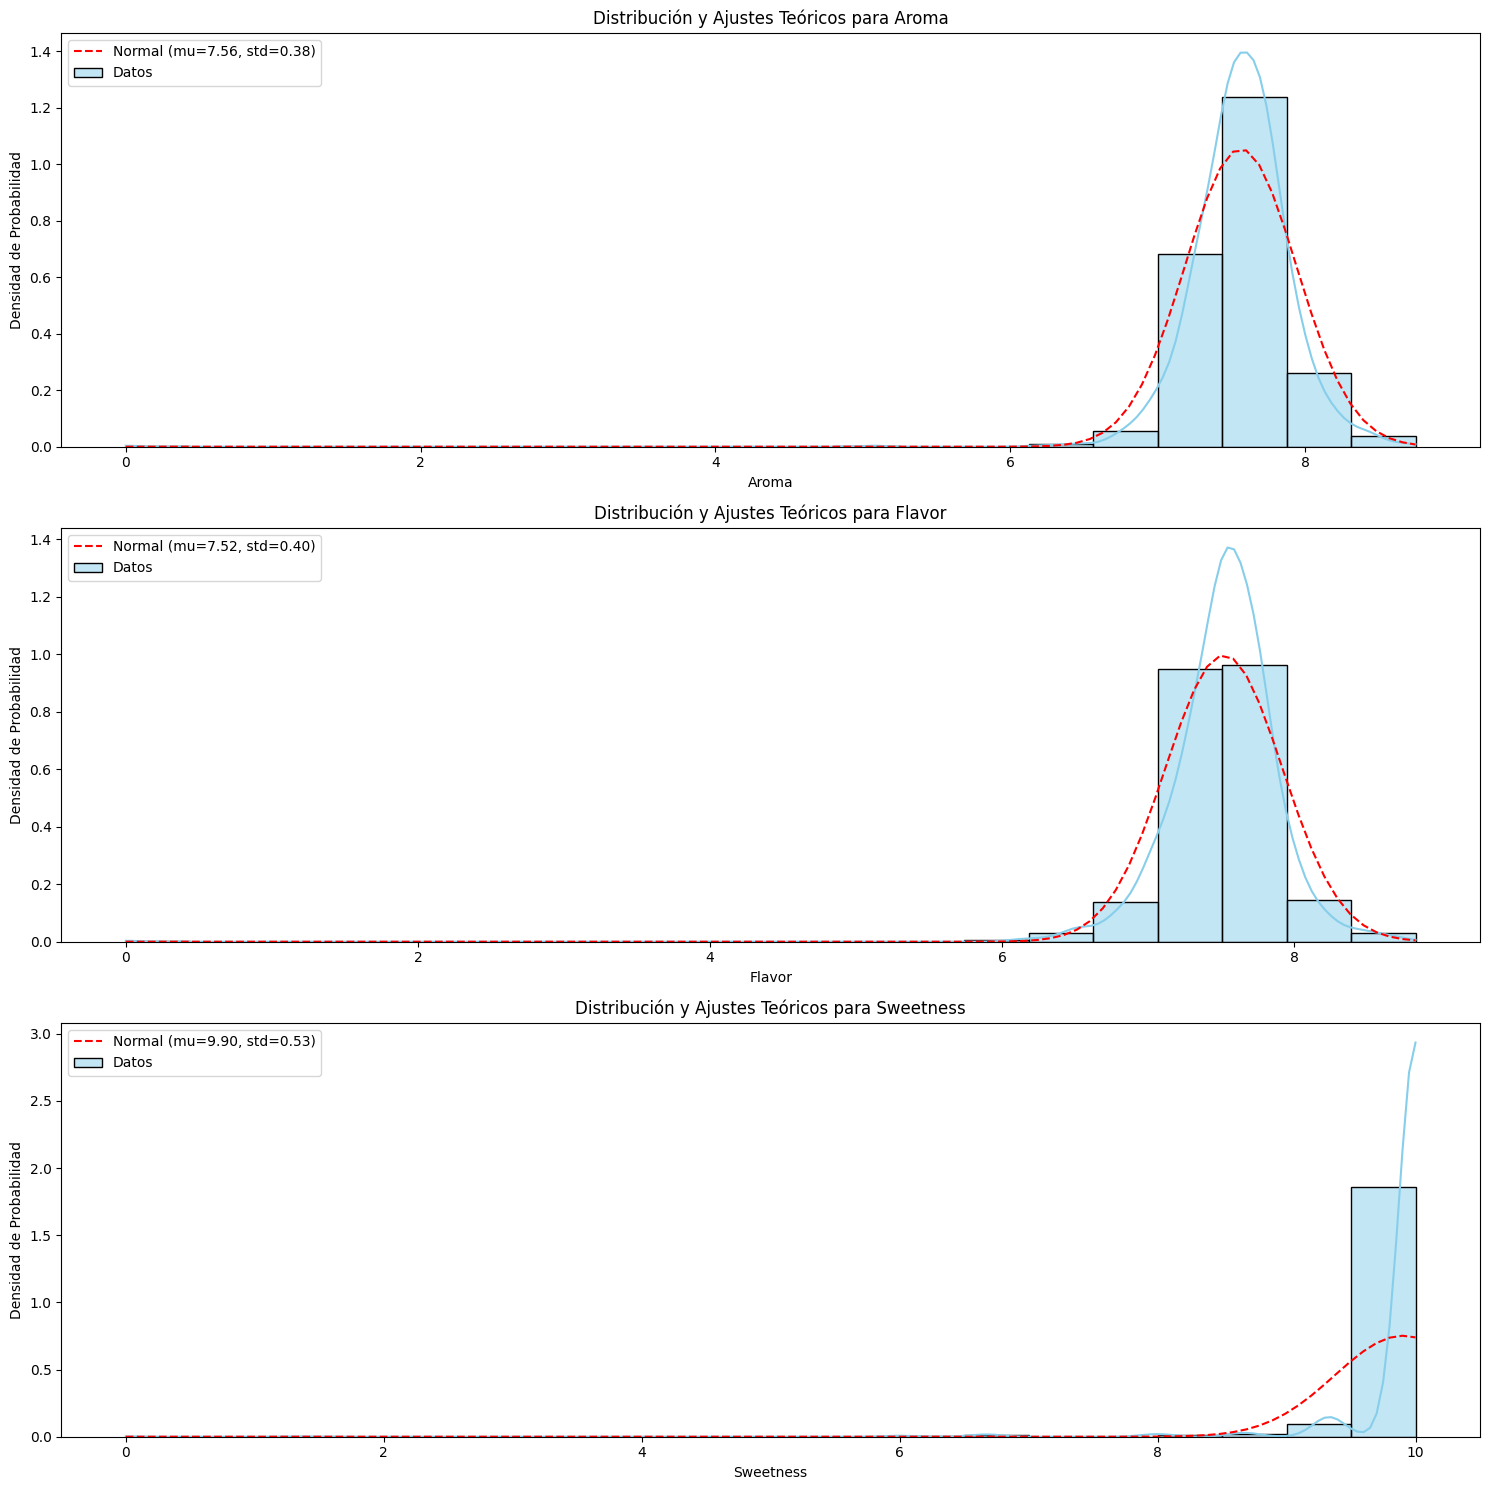


Pruebas de Bondad de Ajuste para la variable Aroma:
  Normal: D=0.9929, p-value=0.0000

Pruebas de Bondad de Ajuste para la variable Flavor:
  Normal: D=0.9906, p-value=0.0000

Pruebas de Bondad de Ajuste para la variable Sweetness:
  Normal: D=0.5014, p-value=0.0000


In [ ]:
# Variables a analizar
variables = ['Aroma', 'Flavor', 'Sweetness']

plt.figure(figsize=(15, 5 * len(variables)))

for i, variable in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    
    # Histograma con KDE para visualizar la distribución de los datos
    sns.histplot(datos[variable], kde=True, stat="density", bins=20, label="Datos", color="skyblue")
    
    # Ajustes a distribuciones comunes
    # Normal
    mu, std = norm.fit(datos[variable])
    x = np.linspace(datos[variable].min(), datos[variable].max(), 100)
    plt.plot(x, norm.pdf(x, mu, std), 'r--', label=f'Normal (mu={mu:.2f}, std={std:.2f})')
    
    # Log-normal (solo si todos los valores son positivos)
    if (datos[variable] > 0).all():
        shape, loc, scale = stats.lognorm.fit(datos[variable], floc=0)
        plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale), 'g--', label=f'Log-normal (shape={shape:.2f})')
    
    # Gamma (también para valores positivos)
    if (datos[variable] > 0).all():
        alpha, loc, beta_param = stats.gamma.fit(datos[variable], floc=0)
        plt.plot(x, stats.gamma.pdf(x, alpha, loc=loc, scale=beta_param), 'b--', label=f'Gamma (alpha={alpha:.2f})')
    
    # Configuración del gráfico
    plt.title(f'Distribución y Ajustes Teóricos para {variable}')
    plt.xlabel(variable)
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()

plt.tight_layout()
plt.show()

# Prueba de bondad de ajuste Kolmogorov-Smirnov para cada distribución
for variable in variables:
    data = datos[variable].dropna()  # Remover valores nulos para el análisis
    print(f"\nPruebas de Bondad de Ajuste para la variable {variable}:")

    # Normal
    D, p_value = kstest(data, 'norm', args=(mu, std))
    print(f"  Normal: D={D:.4f}, p-value={p_value:.4f}")

    # Log-normal (si todos los valores son positivos)
    if (data > 0).all():
        D, p_value = kstest(data, 'lognorm', args=(shape, loc, scale))
        print(f"  Log-normal: D={D:.4f}, p-value={p_value:.4f}")

    # Gamma (si todos los valores son positivos)
    if (data > 0).all():
        D, p_value = kstest(data, 'gamma', args=(alpha, loc, beta_param))
        print(f"  Gamma: D={D:.4f}, p-value={p_value:.4f}")


## 2


### Construya un conjunto de 1000 muestras de datos del tamaño de la muestra original, remuestreando de manera aleatoria los datos originales.

In [ ]:
n_muestras = 1000  # Número de muestras a generar
tamaño_muestra_original = len(datos)  # Tamaño de cada muestra igual al tamaño de la muestra original
muestras_bootstrap = []

for _ in range(n_muestras):
    muestra = datos.sample(n=tamaño_muestra_original, replace=True)  # Remuestreo con reemplazo
    muestras_bootstrap.append(muestra)

muestras_bootstrap_df = pd.concat(muestras_bootstrap, keys=range(n_muestras), names=['Muestra', 'Indice']).reset_index(level='Muestra')

print(muestras_bootstrap_df.head())


        Muestra  Unnamed: 0  Species                        Owner  \
Indice                                                              
1246          0        1247  Arabica               bencafe, s. a.   
14            0          15  Arabica  ethiopia commodity exchange   
376           0         377  Arabica    juan luis alvarado romero   
938           0         939  Arabica     cqi taiwan icp cqi台灣合作夥伴   
86            0          87  Arabica     nomura trading co., ltd.   

       Country.of.Origin                  Farm.Name     Lot.Number  \
Indice                                                               
1246           Nicaragua  el brigadum - la coronela  017/105/16039   
14              Ethiopia                      aolme            NaN   
376            Guatemala                   piamonte     11/23/0696   
938               Taiwan                   山彎有機咖啡農場            NaN   
86             Indonesia                        NaN            NaN   

                    Mill 

## 3

### Para cada una de las 1000 muestras encuentre los parámetros que mejor se ajustan a la distribución teórica que propuso en el punto 1.


In [ ]:
parametros_normal = []
parametros_gamma = []

# Iterar sobre cada muestra para calcular los parámetros
for i in range(n_muestras):
    muestra = muestras_bootstrap[i]
    
    
    muestra = muestra.select_dtypes(include=[np.number]).dropna()

    
    if muestra.empty:
        parametros_normal.append((None, None))
        parametros_gamma.append((None, None, None))
        continue

    # Ajuste de la distribución normal
    mu, std = norm.fit(muestra)
    parametros_normal.append((mu, std))

    # Ajuste de la distribución gamma (si todos los valores son positivos en la muestra)
    if (muestra > 0).all().all():
        alpha, loc, scale = stats.gamma.fit(muestra, floc=0)
        parametros_gamma.append((alpha, loc, scale))
    else:
        parametros_gamma.append((None, None, None))  # Guardar None si no se puede ajustar


df_parametros_normal = pd.DataFrame(parametros_normal, columns=['mu', 'std'])
df_parametros_gamma = pd.DataFrame(parametros_gamma, columns=['alpha', 'loc', 'scale'])

# Mostrar los primeros resultados
print("Parámetros de ajuste para la distribución normal (primeras muestras):")
print(df_parametros_normal.head())

print("\nParámetros de ajuste para la distribución gamma (primeras muestras):")
print(df_parametros_gamma.head())


Parámetros de ajuste para la distribución normal (primeras muestras):
           mu          std
0  334.174259  3667.554475
1  320.375041  3512.471469
2  301.578256  2910.322595
3  306.313958  3226.574727
4  395.823843  5201.456019

Parámetros de ajuste para la distribución gamma (primeras muestras):
  alpha   loc scale
0  None  None  None
1  None  None  None
2  None  None  None
3  None  None  None
4  None  None  None


## 4

### Despliegue la muestra de los parámetros en un histograma. Encuentre los estadśiticos básicos (valor medio, dispersión, quantiles, etc.).


Parámetros de la distribución normal:


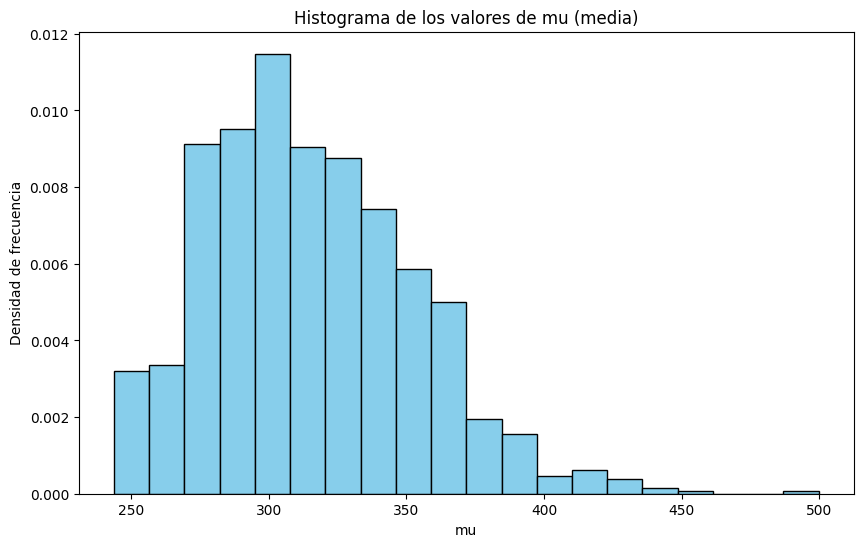

Media de mu: 316.1835001857878
Desviación estándar de mu: 37.84040462589148
Quantiles de mu:
0.25    289.321007
0.50    314.124424
0.75    341.759393
Name: mu, dtype: float64



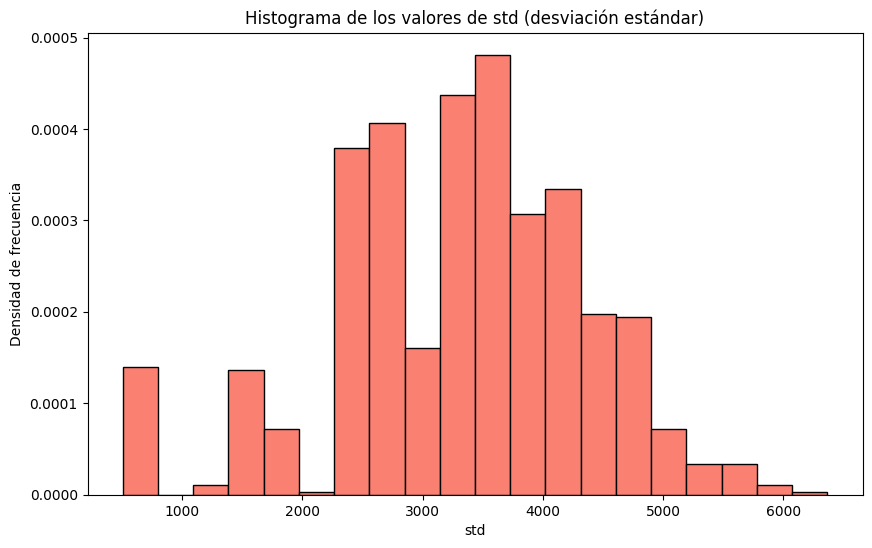

Media de std: 3264.2590601806737
Desviación estándar de std: 1084.067359694322
Quantiles de std:
0.25    2623.609893
0.50    3424.466045
0.75    4076.049808
Name: std, dtype: float64

Parámetros de la distribución gamma:
Media de alpha: nan
Desviación estándar de alpha: nan
Quantiles de alpha:
0.25   NaN
0.50   NaN
0.75   NaN
Name: alpha, dtype: float64

Media de scale: nan
Desviación estándar de scale: nan
Quantiles de scale:
0.25   NaN
0.50   NaN
0.75   NaN
Name: scale, dtype: float64



In [ ]:
# Histograma y estadísticas para los parámetros de la distribución normal
print("Parámetros de la distribución normal:")

# Histograma para mu (media de la distribución normal)
plt.figure(figsize=(10, 6))
plt.hist(df_parametros_normal['mu'].dropna(), bins=20, color='skyblue', edgecolor='black', density=True)
plt.title("Histograma de los valores de mu (media)")
plt.xlabel("mu")
plt.ylabel("Densidad de frecuencia")
plt.show()

# Estadísticas para mu
media_mu = df_parametros_normal['mu'].mean()
std_mu = df_parametros_normal['mu'].std()
quantiles_mu = df_parametros_normal['mu'].quantile([0.25, 0.5, 0.75])
print(f"Media de mu: {media_mu}")
print(f"Desviación estándar de mu: {std_mu}")
print(f"Quantiles de mu:\n{quantiles_mu}\n")

# Histograma para std (desviación estándar de la distribución normal)
plt.figure(figsize=(10, 6))
plt.hist(df_parametros_normal['std'].dropna(), bins=20, color='salmon', edgecolor='black', density=True)
plt.title("Histograma de los valores de std (desviación estándar)")
plt.xlabel("std")
plt.ylabel("Densidad de frecuencia")
plt.show()

# Estadísticas para std
media_std = df_parametros_normal['std'].mean()
std_std = df_parametros_normal['std'].std()
quantiles_std = df_parametros_normal['std'].quantile([0.25, 0.5, 0.75])
print(f"Media de std: {media_std}")
print(f"Desviación estándar de std: {std_std}")
print(f"Quantiles de std:\n{quantiles_std}\n")

# Histograma y estadísticas para los parámetros de la distribución gamma
print("Parámetros de la distribución gamma:")


# Estadísticas para alpha
media_alpha = df_parametros_gamma['alpha'].mean()
std_alpha = df_parametros_gamma['alpha'].std()
quantiles_alpha = df_parametros_gamma['alpha'].quantile([0.25, 0.5, 0.75])
print(f"Media de alpha: {media_alpha}")
print(f"Desviación estándar de alpha: {std_alpha}")
print(f"Quantiles de alpha:\n{quantiles_alpha}\n")


# Estadísticas para scale
media_scale = df_parametros_gamma['scale'].mean()
std_scale = df_parametros_gamma['scale'].std()
quantiles_scale = df_parametros_gamma['scale'].quantile([0.25, 0.5, 0.75])
print(f"Media de scale: {media_scale}")
print(f"Desviación estándar de scale: {std_scale}")
print(f"Quantiles de scale:\n{quantiles_scale}\n")

## 5

### Ajuste la muestra de los parámetros a una distribución Gaussiana con sus estadísticos correspondientes. Presente los resultados como un valor medio y el error estándar.


In [ ]:
media_mu = df_parametros_normal['mu'].mean()
error_std_mu = df_parametros_normal['mu'].std() / np.sqrt(len(df_parametros_normal['mu'].dropna()))

media_std = df_parametros_normal['std'].mean()
error_std_std = df_parametros_normal['std'].std() / np.sqrt(len(df_parametros_normal['std'].dropna()))

print("Resultados para los parámetros de la distribución normal ajustados a una Gaussiana:")
print(f"mu: Valor medio = {media_mu:.4f}, Error estándar = {error_std_mu:.4f}")
print(f"std: Valor medio = {media_std:.4f}, Error estándar = {error_std_std:.4f}\n")

media_alpha = df_parametros_gamma['alpha'].mean()
error_std_alpha = df_parametros_gamma['alpha'].std() / np.sqrt(len(df_parametros_gamma['alpha'].dropna()))

media_scale = df_parametros_gamma['scale'].mean()
error_std_scale = df_parametros_gamma['scale'].std() / np.sqrt(len(df_parametros_gamma['scale'].dropna()))

print("Resultados para los parámetros de la distribución gamma ajustados a una Gaussiana:")
print(f"alpha: Valor medio = {media_alpha:.4f}, Error estándar = {error_std_alpha:.4f}")
print(f"scale: Valor medio = {media_scale:.4f}, Error estándar = {error_std_scale:.4f}")


Resultados para los parámetros de la distribución normal ajustados a una Gaussiana:
mu: Valor medio = 316.1835, Error estándar = 1.1966
std: Valor medio = 3264.2591, Error estándar = 34.2812

Resultados para los parámetros de la distribución gamma ajustados a una Gaussiana:
alpha: Valor medio = nan, Error estándar = nan
scale: Valor medio = nan, Error estándar = nan


## 6

### Desarrolle un bootstrap paramérico produciendo un conjunto de 1000 muestras de datos del tamaño de la muestra original a partir de la distribución teórica que propuso en el punto 1, con los parámetros que obtiene ajustando los datos originales.


In [10]:
# Definir los parámetros ajustados a la distribución teórica para el bootstrap paramétrico
# (mu y std en el caso de una distribución normal)
mu_ajustado, std_ajustado = norm.fit(datos['Aroma'])  # Cambia 'Aroma' por la variable correspondiente

# Crear una lista para almacenar las muestras de bootstrap
muestras_bootstrap_param = []

# Realizar el bootstrap paramétrico generando muestras de una distribución normal con los parámetros ajustados
for _ in range(1000):
    muestra_param = np.random.normal(loc=mu_ajustado, scale=std_ajustado, size=len(datos))
    muestras_bootstrap_param.append(muestra_param)

# Convertir las muestras a un DataFrame para facilitar el análisis
df_bootstrap_param = pd.DataFrame(muestras_bootstrap_param).T

# Mostrar las primeras filas del DataFrame de bootstrap
print("Ejemplo de las primeras muestras bootstrap paramétricas:")
print(df_bootstrap_param.head())


Ejemplo de las primeras muestras bootstrap paramétricas:
        0         1         2         3         4         5         6    \
0  7.612842  8.023757  7.726138  7.692871  7.886239  8.019723  7.737401   
1  7.582422  7.714048  8.079515  7.400219  7.653555  7.551218  7.776764   
2  7.672401  7.286013  7.301194  7.682201  6.996166  7.540474  8.121143   
3  7.484026  7.518728  7.442089  7.345162  8.117159  7.343221  7.551110   
4  7.605757  7.871799  6.989205  6.889384  7.235817  7.672119  8.104983   

        7         8         9    ...       990       991       992       993  \
0  7.609180  6.916989  8.585747  ...  6.882214  7.650277  7.495012  7.408799   
1  8.144196  7.658590  7.314728  ...  8.085350  7.888141  7.632644  7.127598   
2  7.679086  8.480155  7.247435  ...  7.663913  7.328474  7.743274  6.787375   
3  7.385660  7.419684  7.725662  ...  7.425015  7.485987  7.327389  7.350711   
4  7.402557  7.223642  7.389441  ...  8.176109  7.645169  6.872262  8.828522   

        994

## 7

### Repita el pasos 4 y 5 para el bootstrap paramétrico.

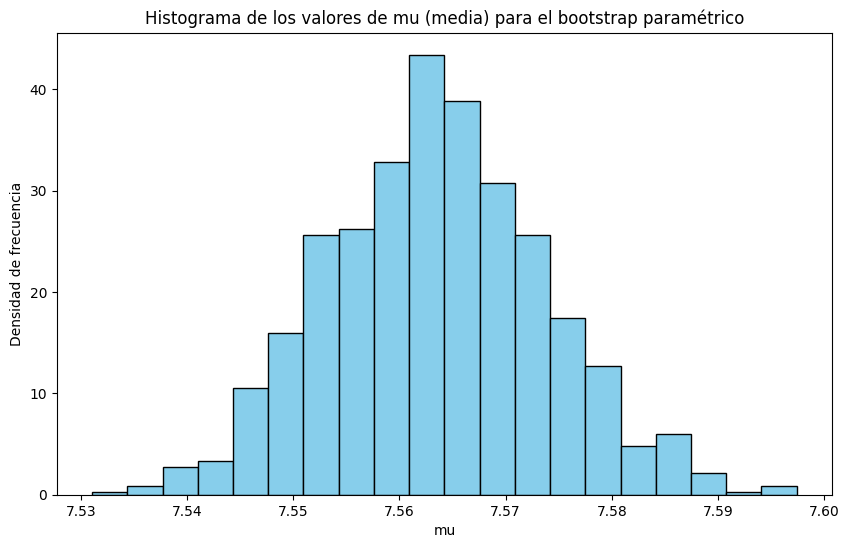

Media de mu (bootstrap paramétrico): 7.563559130876374
Desviación estándar de mu (bootstrap paramétrico): 0.010285577363111996
Quantiles de mu (bootstrap paramétrico):
0.25    7.556526
0.50    7.563290
0.75    7.570342
Name: mu, dtype: float64



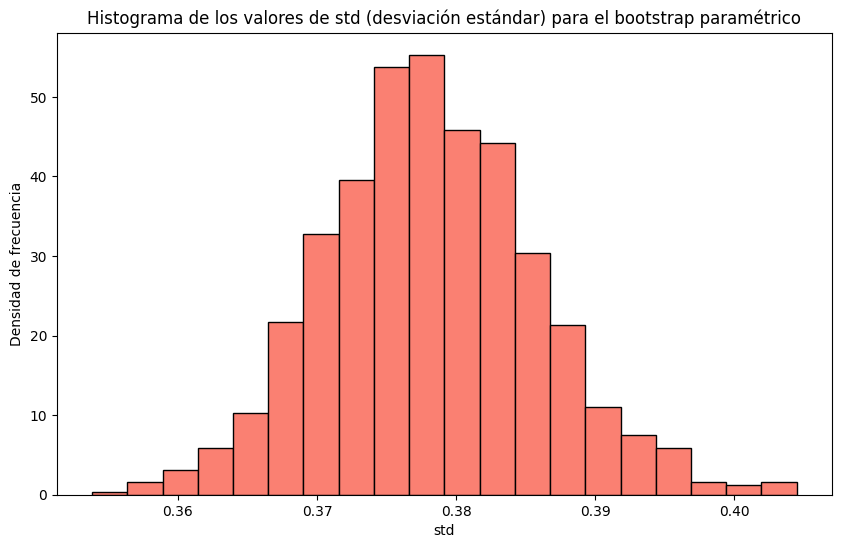

Media de std (bootstrap paramétrico): 0.37822834799736654
Desviación estándar de std (bootstrap paramétrico): 0.007687034085753094
Quantiles de std (bootstrap paramétrico):
0.25    0.373038
0.50    0.378012
0.75    0.383184
Name: std, dtype: float64

Resultados para los parámetros del bootstrap paramétrico ajustados a una Gaussiana:
mu: Valor medio = 7.5636, Error estándar = 0.0003
std: Valor medio = 0.3782, Error estándar = 0.0002


In [ ]:

parametros_bootstrap_param = []

# Ajustar cada muestra generada en el bootstrap paramétrico
for col in df_bootstrap_param.columns:
    
    muestra = df_bootstrap_param[col]
    
    
    mu_param, std_param = norm.fit(muestra)
    parametros_bootstrap_param.append((mu_param, std_param))


df_parametros_bootstrap_param = pd.DataFrame(parametros_bootstrap_param, columns=['mu', 'std'])

# Histograma para 'mu'
plt.figure(figsize=(10, 6))
plt.hist(df_parametros_bootstrap_param['mu'].dropna(), bins=20, color='skyblue', edgecolor='black', density=True)
plt.title("Histograma de los valores de mu (media) para el bootstrap paramétrico")
plt.xlabel("mu")
plt.ylabel("Densidad de frecuencia")
plt.show()

# Estadísticas para 'mu'
media_mu_param = df_parametros_bootstrap_param['mu'].mean()
std_mu_param = df_parametros_bootstrap_param['mu'].std()
quantiles_mu_param = df_parametros_bootstrap_param['mu'].quantile([0.25, 0.5, 0.75])
print(f"Media de mu (bootstrap paramétrico): {media_mu_param}")
print(f"Desviación estándar de mu (bootstrap paramétrico): {std_mu_param}")
print(f"Quantiles de mu (bootstrap paramétrico):\n{quantiles_mu_param}\n")

# Histograma para 'std'
plt.figure(figsize=(10, 6))
plt.hist(df_parametros_bootstrap_param['std'].dropna(), bins=20, color='salmon', edgecolor='black', density=True)
plt.title("Histograma de los valores de std (desviación estándar) para el bootstrap paramétrico")
plt.xlabel("std")
plt.ylabel("Densidad de frecuencia")
plt.show()

# Estadísticas para 'std'
media_std_param = df_parametros_bootstrap_param['std'].mean()
std_std_param = df_parametros_bootstrap_param['std'].std()
quantiles_std_param = df_parametros_bootstrap_param['std'].quantile([0.25, 0.5, 0.75])
print(f"Media de std (bootstrap paramétrico): {media_std_param}")
print(f"Desviación estándar de std (bootstrap paramétrico): {std_std_param}")
print(f"Quantiles de std (bootstrap paramétrico):\n{quantiles_std_param}\n")




media_mu_bootstrap = df_parametros_bootstrap_param['mu'].mean()
error_std_mu_bootstrap = df_parametros_bootstrap_param['mu'].std() / np.sqrt(len(df_parametros_bootstrap_param['mu'].dropna()))

# Calcular el valor medio y error estándar para 'std'
media_std_bootstrap = df_parametros_bootstrap_param['std'].mean()
error_std_std_bootstrap = df_parametros_bootstrap_param['std'].std() / np.sqrt(len(df_parametros_bootstrap_param['std'].dropna()))

# Resultados
print("Resultados para los parámetros del bootstrap paramétrico ajustados a una Gaussiana:")
print(f"mu: Valor medio = {media_mu_bootstrap:.4f}, Error estándar = {error_std_mu_bootstrap:.4f}")
print(f"std: Valor medio = {media_std_bootstrap:.4f}, Error estándar = {error_std_std_bootstrap:.4f}")


## 8

### Compare ambos resultados y saque las conclusiones sobre el procedimiento. Incluya la discusión de clase sobre cómo definir que dos estadáditicos son iguales comparando sus intervalos.

In [18]:
# Cálculo de intervalos de confianza para el bootstrap muestral
ic_mu_muestral = (
    media_mu - 1.96 * error_std_mu,
    media_mu + 1.96 * error_std_mu
)
ic_std_muestral = (
    media_std - 1.96 * error_std_std,
    media_std + 1.96 * error_std_std
)

# Cálculo de intervalos de confianza para el bootstrap paramétrico
ic_mu_parametrico = (
    media_mu_bootstrap - 1.96 * error_std_mu_bootstrap,
    media_mu_bootstrap + 1.96 * error_std_mu_bootstrap
)
ic_std_parametrico = (
    media_std_bootstrap - 1.96 * error_std_std_bootstrap,
    media_std_bootstrap + 1.96 * error_std_std_bootstrap
)

# Mostrar resultados
print("Intervalos de confianza (IC 95%):\n")
print(f"Bootstrap muestral - mu: {ic_mu_muestral}")
print(f"Bootstrap muestral - std: {ic_std_muestral}")
print(f"Bootstrap paramétrico - mu: {ic_mu_parametrico}")
print(f"Bootstrap paramétrico - std: {ic_std_parametrico}")

# Verificar solapamiento
mu_solapado = (ic_mu_muestral[1] >= ic_mu_parametrico[0]) and (ic_mu_muestral[0] <= ic_mu_parametrico[1])
std_solapado = (ic_std_muestral[1] >= ic_std_parametrico[0]) and (ic_std_muestral[0] <= ic_std_parametrico[1])

print("\nConclusión sobre el solapamiento:")
print(f"¿Los intervalos para mu se solapan? {'Sí' if mu_solapado else 'No'}")
print(f"¿Los intervalos para std se solapan? {'Sí' if std_solapado else 'No'}")


Intervalos de confianza (IC 95%):

Bootstrap muestral - mu: (np.float64(313.83812760826413), np.float64(318.5288727633115))
Bootstrap muestral - std: (np.float64(3197.0678691045637), np.float64(3331.4502512567838))
Bootstrap paramétrico - mu: (np.float64(7.562921624186635), np.float64(7.564196637566114))
Bootstrap paramétrico - std: (np.float64(0.3777519006885849), np.float64(0.3787047953061482))

Conclusión sobre el solapamiento:
¿Los intervalos para mu se solapan? No
¿Los intervalos para std se solapan? No
